In [15]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt
import missingno as msno

In [16]:
# chargement et affichage des données
df = pd.read_csv('../course+-+Quiz+P2.csv')
print(df)

     Position Sexe     Temps  Dept  Temps_secondes   Age
0           1    M  00:32:23    76          779543  40.0
1           2    M  00:32:40    27          779560  34.0
2           3    M  00:33:15    76          779595  44.0
3           4    M  00:33:23    76          779603  46.0
4           5    M  00:33:29    76          779609  26.0
..        ...  ...       ...   ...             ...   ...
335       336    F  01:08:34    27          781714  41.0
336       337    F  01:08:36    27          781716  48.0
337       338    M  01:09:31    27          781771  24.0
338       339    F  01:09:31    27          781771  25.0
339       340    F  01:10:31    76          781831  41.0

[340 rows x 6 columns]


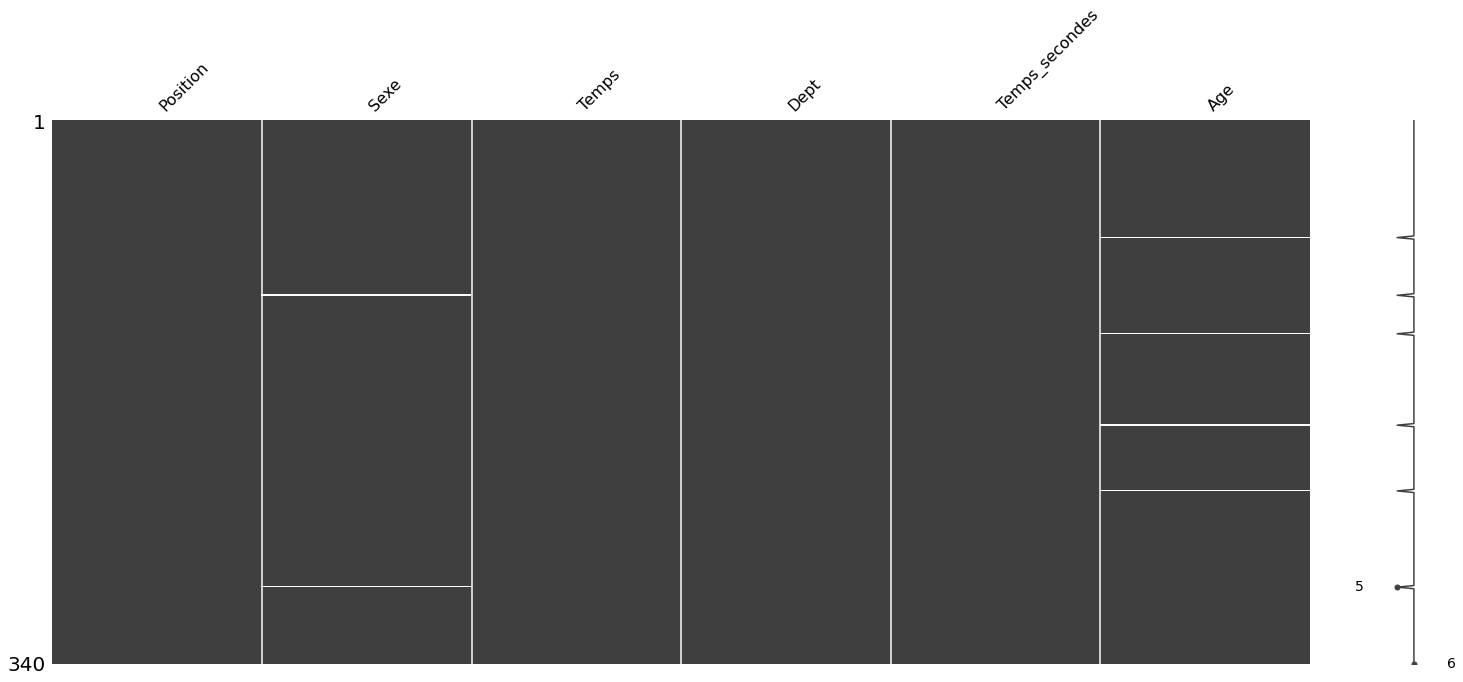

In [17]:
msno.matrix(df);

In [18]:
print(df.isnull().sum())

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               4
dtype: int64


In [19]:
df['Dept'].unique()

array([76, 27, 14, 78])

In [20]:
import numpy as np

# On suppose que les données sont stockées dans un tableau numpy nommé "data"
def outliers(df, df_column):
    # Calcul des quantiles
    q1, q3 = np.percentile(df_column, [25, 75])

    # Calcul du seuil à partir des quantiles
    threshold = 1.5 * (q3 - q1)

    # Détection des outliers
    outliers = df[(df_column < q1 - threshold) | (df_column > q3 + threshold)]

    # Affichage des outliers
    print(outliers)

data = [float(x) for x in df['Position']]
outliers(df, data)


     Position Sexe     Temps  Dept  Temps_secondes   Age
264      2640    M  00:56:21    76          780981  51.0


In [22]:
data = [float(x) for x in df['Age']]
outliers(df, data)

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []


In [23]:
data = [float(x) for x in df['Temps_secondes']]
outliers(df, data)

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age]
Index: []


-100

<AxesSubplot:xlabel='Sexe', ylabel='Position'>

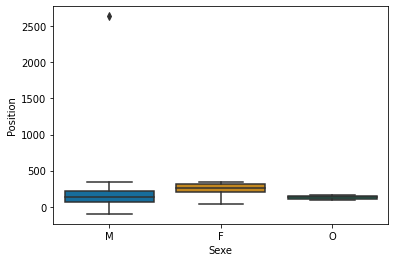

In [26]:
sns.boxplot(x='Sexe', y= 'Position', data = df,
                     palette= 'colorblind')

In [32]:
s = df.duplicated()
df = df.assign(duplicated=s)
duplicate_rows = df[df["duplicated"] == True]
print(duplicate_rows)

Empty DataFrame
Columns: [Position, Sexe, Temps, Dept, Temps_secondes, Age, duplicated]
Index: []


In [34]:
df['Sexe'].unique()

array(['M', 'F', 'O', nan], dtype=object)

In [36]:
from collections import Counter

# On suppose que les données sont stockées dans une liste nommée "data"

# Calcul de la distribution empirique
distribution = Counter(df['Sexe'])

# Affichage de la distribution
print(distribution)

Counter({'M': 244, 'F': 92, 'O': 2, nan: 2})


In [37]:
from collections import Counter

def empirical_distribution(data):
    # Calcul de la distribution empirique
    distribution = Counter(data)

    # Calcul du nombre total d'éléments
    total = sum(distribution.values())

    # Calcul des pourcentages
    for value, count in distribution.items():
        distribution[value] = count / total

    return distribution

# Exemple d'utilisation
data = ['A', 'B', 'A', 'C', 'B', 'A', 'A']
distribution = empirical_distribution(data)
print(distribution)


Counter({'A': 0.5714285714285714, 'B': 0.2857142857142857, 'C': 0.14285714285714285})


In [38]:
for value, percentage in distribution.items():
    print(f'{value}: {percentage:.2%}')


A: 57.14%
B: 28.57%
C: 14.29%


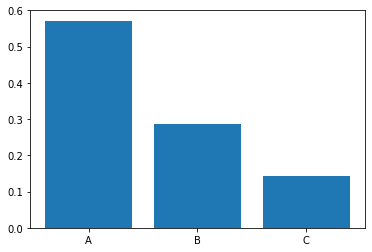

In [39]:
import matplotlib.pyplot as plt

# Récupération des valeurs et des pourcentages
values, percentages = zip(*distribution.items())

# Création du graphique
plt.bar(values, percentages)

# Affichage du graphique
plt.show()


In [44]:
df.mod

NameError: name 'mod' is not defined